<strong><h1>
Alumnos: Franco Casconi, Kevin Cravero, Alan Bilsky
    
Tutor/a: Daniela Blanco

Dataset: Credit Card record </h1><strong>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

#Leo el archivo
df = pd.read_csv(r'C:\Users\albil\OneDrive\Escritorio\CoderHouse\DS\CC\application_record.csv')
cr = pd.read_csv(r'C:\Users\albil\OneDrive\Escritorio\CoderHouse\DS\CC\credit_record.csv')

#Filtro de mujeres con alta educación
mujeres = df.loc[(df['CODE_GENDER'] == 'F') & (df['NAME_EDUCATION_TYPE'] == 'Higher education')]

# hombres = cc.loc[(cc['CODE_GENDER'] == 'M')]
# df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].map(str) 
# df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].map(str)

# Normalizar edades
df['AGE_YEARS']=df['DAYS_BIRTH']/365.2425*-1
df.drop('DAYS_BIRTH', axis=1, inplace=True)

# Normalizar años de empelo
df['YEARS_EMPLOYED']=-df['DAYS_EMPLOYED']/365.2425
df.loc[df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0
df.drop('DAYS_EMPLOYED', axis=1, inplace=True)

# Indicador de desempleo
df['UNEMPLOYED']=0

# Llenar NA
df['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

#Definir STATUS con deuda
cr['STATUS'] = np.where((cr['STATUS'] == '3' )| (cr['STATUS'] == '4' )| (cr['STATUS'] == '5'), 1, 0) # define > 30 days past-due

# Merge 
df1=pd.merge(df, cr, how='inner', on=['ID'])

#Redondear decimales
df1 = df1.round(decimals = 0)

df1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,UNEMPLOYED,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,33.0,12.0,0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,33.0,12.0,0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,33.0,12.0,0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,33.0,12.0,0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,33.0,12.0,0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,25.0,3.0,0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,25.0,3.0,0,-10,0
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,25.0,3.0,0,-11,0
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,25.0,3.0,0,-12,0


<strong><h3>Grafico 1 de Matplotlib - Histograma </h3><strong>

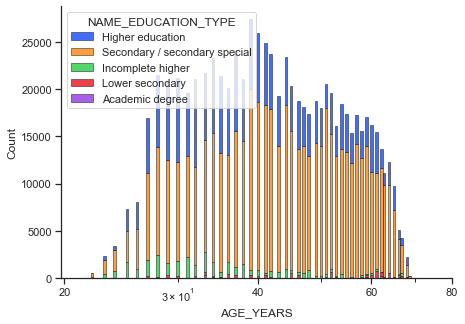

In [2]:
'''Grafico 1 de matplotlib - Histograma. En este grafico podemos evaluar cual es el nivel educacional a lo largo de la vida de las personas muestreadas en el dataset, 
con distintos picos y una curva de crecimiento educacional muy clara hasta los 40 años siendo  "Higher Education" y "Secondary Education" los valores con 
mayor cantidad de personas. Por otra parte "Incomplete Higher" queda en tercer lugar con una reduccion muy considerable en comparacion a los primeros dos, 
y finalmente "Lower Secondary" y "Academic Degree" siendo los grupos mas pequeños de personas y con una muy pequeña cantidad de gente muestreada
con titulo universitario.'''

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")


f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df1,
    x="AGE_YEARS", hue="NAME_EDUCATION_TYPE",
    palette="bright",
    edgecolor=".1",
    linewidth=.5,
    multiple="stack",
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([20, 40, 60, 80])



<strong><h3>
Grafico 2 de Matplotlib - Grafico de barras </h3><strong>

In [ ]:
'''#Grafico 2 de matplotlib - Grafico de barras. Relacion sueldo - vivienda de mujeres con alto nivel de educación. 
Se puede observar una mayor cantidad de mujeres con alto nivel de educacion que viven en Casa/Departamento, con sueldos mas altos. '''

fig, ax = plt.subplots(figsize=(8,4))
x=mujeres["NAME_HOUSING_TYPE"]
y=mujeres["AMT_INCOME_TOTAL"]
ax.bar(x, y)
ax.set_title('Relacion sueldo - vivienda de mujeres con alta educación')
ax.set_ylabel('Sueldos')
ax.set_xlabel('Vivienda')
ax.tick_params(labelsize=7)


<strong><h3>
Grafico 3 de Matplotlib - Grafico de lineas </h3><strong>

In [ ]:
'''#Grafico 3 de matplotlib - Grafico de lineas. Edad de personas muestreadas con la cantidad de años que fueron empleados.'''

x = df1['AGE_YEARS']
y = df1['YEARS_EMPLOYED']

plt.plot(x, y)
plt.title('Edad vs Cantidad de años como empleado')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.show()


<strong><h3>
Grafico 1 de Seaborn - Grafico de distribucion </h3><strong>

In [ ]:
'''Grafico 1 de Seaborn - Grafico de distribucion de tamaño de familia por estado civil. Se puede observar una mayor densidad de personas casadas con familias más grandes, 
seguido por personas casadas por civil y gran densidad por parte de las personas solteras sin hijos. '''

plt.figure()
# Figure -level
ax = sns.displot(data=df1, x='CNT_FAM_MEMBERS', kind='kde', hue='NAME_FAMILY_STATUS', fill=True)
ax.set(xlabel='Tamaño de familia', ylabel='Densidad', title='Tamaño de la familia por estado civil')

<strong><h3>
Grafico 2 de Seaborn - Gráfico tipo violín </h3><strong>

In [ ]:
''' Grafico 2 de Seaborn -  Gráfico tipo violín. Indica el tamaño familiar de las personas muestreadas basado en su nivel educativo. 
Se puede observar un tamaño familiar mas numeroso en personas con mayor educación. '''
#Nota: no supimos como agrandar el tamaño del gráfico para poder mostrarlo de manera más clara.

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")


# Change width
sns.violinplot(x=df["NAME_EDUCATION_TYPE"], y=df["CNT_FAM_MEMBERS"], width=1)
plt.tick_params(labelsize=6)
plt.show()


<strong><h3>
Grafico 3 de Seaborn - Diagrama de dispersión </h3><strong>

In [ ]:
'''Grafico 3 de Seaborn - Diagrama de dispersión. En este gráfico podemos observar los tamaños de familia y su respectiva cantidad de hijos, diferenciado por hombres y mujeres.
Cabe destacar que el dataset contiene una gran mayoría de mujeres.'''

import seaborn as sns; sns.set(color_codes=True)

g = sns.lmplot(x="CNT_FAM_MEMBERS", y="CNT_CHILDREN", hue="CODE_GENDER", data=df1)